In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [18]:
df = pd.read_csv("BankChurners.csv")
df = df.iloc[:, 0:21]
df


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [13]:
df.shape


(10127, 21)

In [14]:
df.drop_duplicates()
df.shape

(10127, 21)

Можно сделать вывод, что в данном датасете поаторяющихся значений 


In [15]:
df.isnull().mean() * 100

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

В данном датасете нет нулевых значений

In [16]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Значений Nan также нет в данном датасете 

In [17]:
print(df.skew(numeric_only=True))

CLIENTNUM                   0.995601
Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64


Вычисление асимметрии для каждого числового столбца.

# Обнаружение аномалий


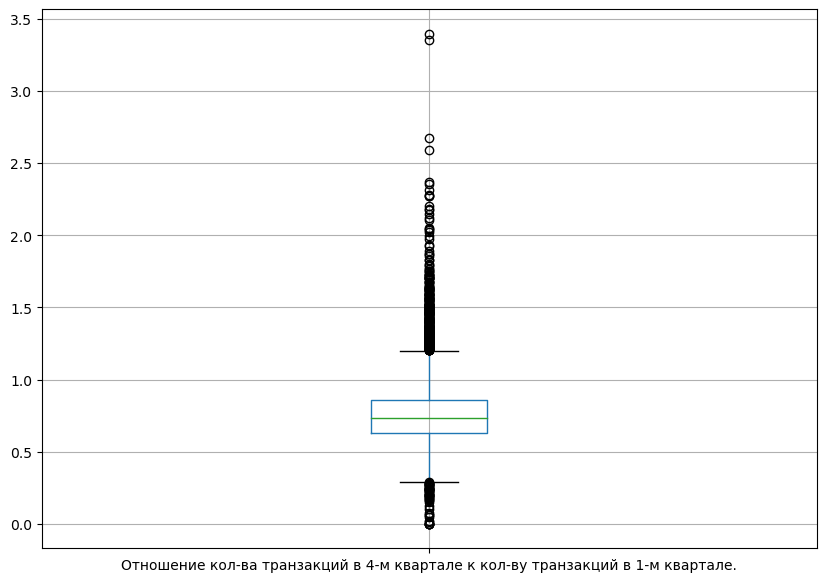

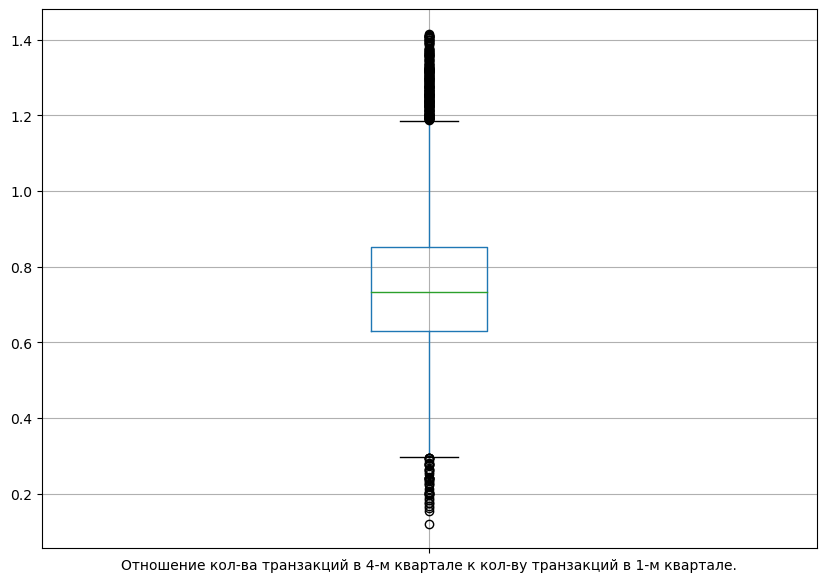

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Создаем фигуру и строим boxplot
plt.figure(figsize=(10, 7))
df.boxplot(column=['Total_Amt_Chng_Q4_Q1'])
plt.xticks(ticks=[1], labels=['Отношение кол-ва транзакций в 4-м квартале к кол-ву транзакций в 1-м квартале.'])

# Находим среднее и стандартное отклонение
mean = df['Total_Amt_Chng_Q4_Q1'].mean()
std = df['Total_Amt_Chng_Q4_Q1'].std()

# Определяем границы для удаления выбросов
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Удаляем выбросы
df_filtered = df[(df['Total_Amt_Chng_Q4_Q1'] >= lower_bound) & (df['Total_Amt_Chng_Q4_Q1'] <= upper_bound)]


# Показываем обновленный график без выбросов
plt.figure(figsize=(10, 7))
df_filtered.boxplot(column=['Total_Amt_Chng_Q4_Q1'])
plt.xticks(ticks=[1], labels=['Отношение кол-ва транзакций в 4-м квартале к кол-ву транзакций в 1-м квартале.'])
plt.show()


## Описательная статистика

In [19]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file(output_file='/Users/evgenijselisev/Desktop/qwr.html')  

/Users/evgenijselisev/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 64.43it/s]


/var/folders/m6/y8y0452x1rvbnprl_hr584r40000gn/T/ipykernel_88351/921673656.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot(kind='density', subplots=True, layout=(5, 3), sharex=False, ax=ax)


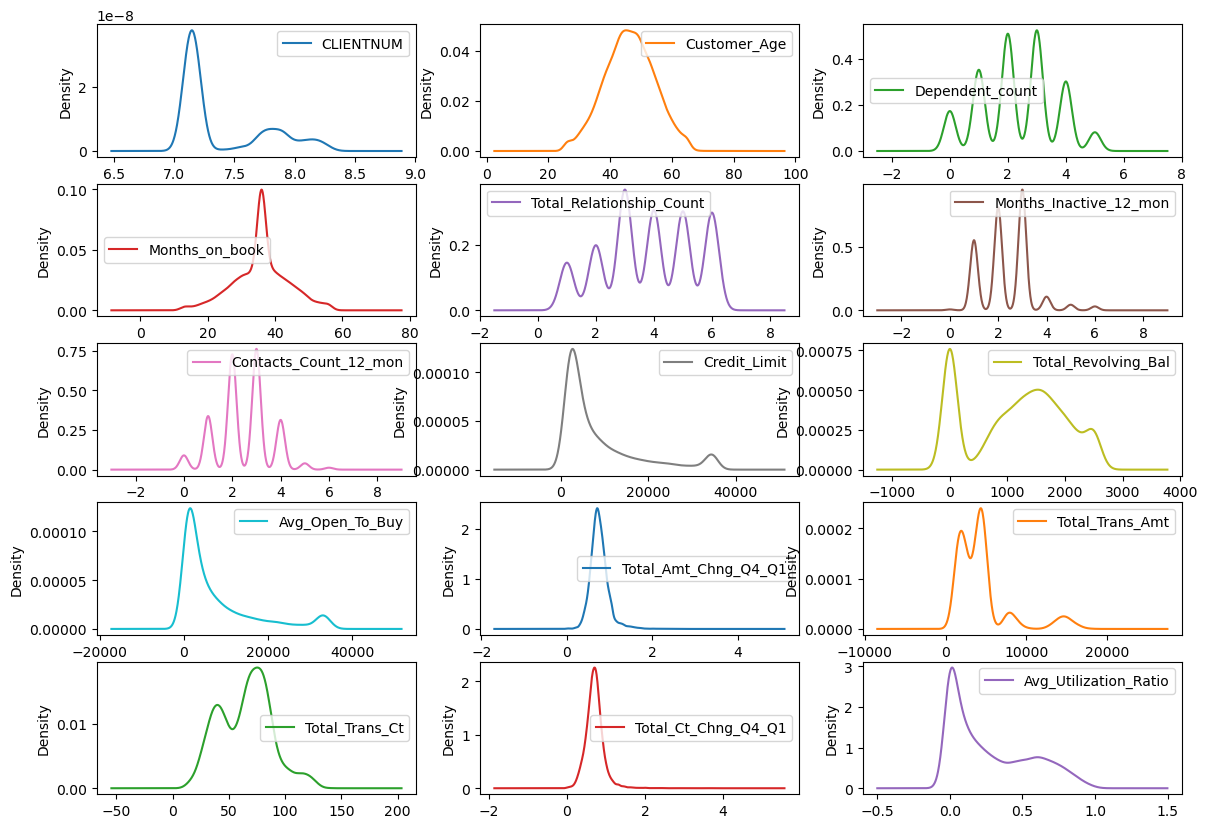

In [22]:
fig, ax = plt.subplots(figsize=(14, 10))
df.plot(kind='density', subplots=True, layout=(5, 3), sharex=False, ax=ax)
plt.show()

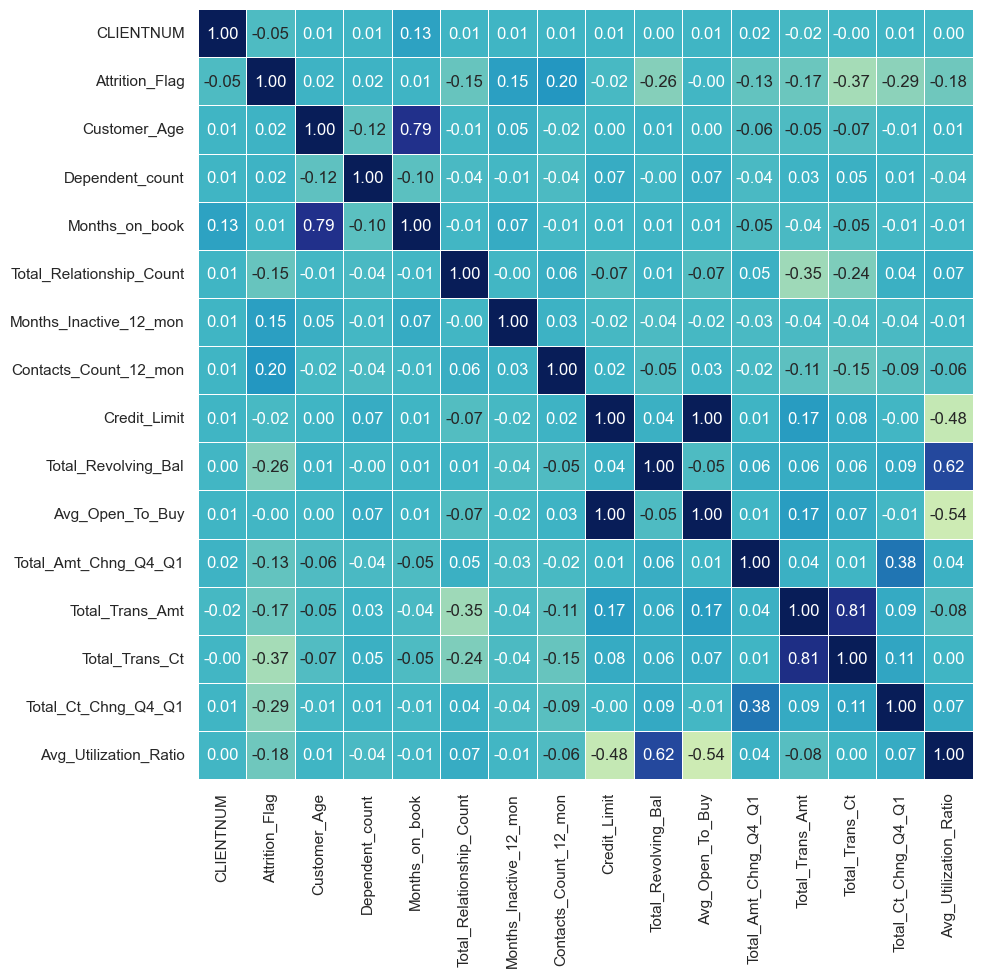

In [23]:

codes = {'Existing Customer': 0, 'Attrited Customer': 1}

data_clean = df.copy()

data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map(codes).astype(int)

data_clean = data_clean.select_dtypes(include=[int, float])

sns.set(rc={"figure.figsize": (10, 10)})

sns.heatmap(
    data_clean.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

## PCA

In [14]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Выбираем признаки
features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']
x = df.loc[:, features].values

# Стандартизируем данные
x = StandardScaler().fit_transform(x)
scaled_df = pd.DataFrame(data=x, columns=features)
scaled_df.head()




,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [15]:
# Применяем PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1'])
principalDf.head()


,principal component 1
0,-0.451862
1,0.312017
2,0.309539
3,-0.241374
4,0.791500


# Encoding

In [26]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Определяем переменные для кодирования
ordinal_enc_variables = ["Education_Level", "Income_Category", "Card_Category", "Attrition_Flag"]
one_hot_enc_variables = ["Gender", "Marital_Status"]

# Определяем категории для упорядоченного кодирования
edu_lvl = ["Unknown", "Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"]
income_cat = ["Unknown", "Less than $40K", "$40K - $60K", "$80K - $120K", "$60K - $80K", "$120K +"]
card_cat = ["Blue", "Silver", "Gold", "Platinum"]

# Создаем копии исходного набора данных
df_encoded = df.copy()

# Упорядоченное кодирование переменных
ord_enc = OrdinalEncoder(categories=[edu_lvl, income_cat, card_cat, ["Existing Customer", "Attrited Customer"]])
df_encoded[ordinal_enc_variables] = ord_enc.fit_transform(df_encoded[ordinal_enc_variables])

# Кодирование переменных
one_hot_enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
one_hot_enc_df = pd.DataFrame(one_hot_enc.fit_transform(df_encoded[one_hot_enc_variables]))

# Присваиваем имен признакам после кодирования
one_hot_enc_df.columns = one_hot_enc.get_feature_names_out(one_hot_enc_variables)

# Объединяем закодированные переменные с основным набором данных
df_encoded = pd.concat([df_encoded.drop(one_hot_enc_variables, axis=1), one_hot_enc_df], axis=1)

df_encoded


,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,0.0,45,3,2.0,4.0,0.0,39,5,1,...,1144,42,1.625,0.061,0.0,1.0,0.0,1.0,0.0,0.0
1,818770008,0.0,49,5,4.0,1.0,0.0,44,6,1,...,1291,33,3.714,0.105,1.0,0.0,0.0,0.0,1.0,0.0
2,713982108,0.0,51,3,4.0,3.0,0.0,36,4,1,...,1887,20,2.333,0.000,0.0,1.0,0.0,1.0,0.0,0.0
3,769911858,0.0,40,4,2.0,1.0,0.0,34,3,4,...,1171,20,2.333,0.760,1.0,0.0,0.0,0.0,0.0,1.0
4,709106358,0.0,40,3,1.0,4.0,0.0,21,5,1,...,816,28,2.500,0.000,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0.0,50,2,4.0,2.0,0.0,40,3,2,...,15476,117,0.857,0.462,0.0,1.0,0.0,0.0,1.0,0.0
10123,710638233,1.0,41,2,0.0,2.0,0.0,25,4,2,...,8764,69,0.683,0.511,0.0,1.0,1.0,0.0,0.0,0.0
10124,716506083,1.0,44,1,2.0,1.0,0.0,36,5,3,...,10291,60,0.818,0.000,1.0,0.0,0.0,1.0,0.0,0.0
10125,717406983,1.0,30,2,4.0,2.0,0.0,36,4,3,...,8395,62,0.722,0.000,0.0,1.0,0.0,0.0,0.0,1.0


## Нормализация

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Выбраем числовые переменные для нормализации
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                      'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                      'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                      'Avg_Utilization_Ratio']

# Создаем новый датафрейм только с числовыми переменными
newdf = df[numerical_features]

# Инициализируем нормализатор
scaler = MinMaxScaler()

# Передаем датафрейм и преобразовать
scaled_features = scaler.fit_transform(newdf)

# Конвертирум в табличный формат
df_MinMax = pd.DataFrame(data=scaled_features, columns=numerical_features)


df_MinMax


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.392994,0.035273,0.248062,0.437534,0.061061
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.453636,0.043452,0.178295,1.000000,0.105105
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.763615,0.076611,0.077519,0.628164,0.000000
3,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.413600,0.036775,0.077519,0.628164,0.760761
4,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.640271,0.017025,0.139535,0.673129,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.510638,0.4,0.627907,0.4,0.333333,0.500000,0.077536,0.735399,0.206947,0.832647,0.829457,0.230749,0.462462
10123,0.319149,0.4,0.279070,0.6,0.333333,0.500000,0.085819,0.868494,0.236679,0.459219,0.457364,0.183899,0.511512
10124,0.382979,0.2,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.241095,0.544175,0.387597,0.220248,0.000000
10125,0.085106,0.4,0.534884,0.6,0.500000,0.500000,0.116172,0.000000,0.157492,0.438689,0.403101,0.194400,0.000000


## Биннинг


In [28]:
# Определим количество бинов (интервалов)
num_bins = 5

# Применяем биннинг к переменной Customer_Age
df['Customer_Age_binned'] = pd.cut(df['Customer_Age'], bins=num_bins)


df['Customer_Age_binned']


0          (44.8, 54.2]
1          (44.8, 54.2]
2          (44.8, 54.2]
3          (35.4, 44.8]
4          (35.4, 44.8]
              ...      
10122      (44.8, 54.2]
10123      (35.4, 44.8]
10124      (35.4, 44.8]
10125    (25.953, 35.4]
10126      (35.4, 44.8]
Name: Customer_Age_binned, Length: 10127, dtype: category
Categories (5, interval[float64, right]): [(25.953, 35.4] < (35.4, 44.8] < (44.8, 54.2] < (54.2, 63.6] < (63.6, 73.0]]

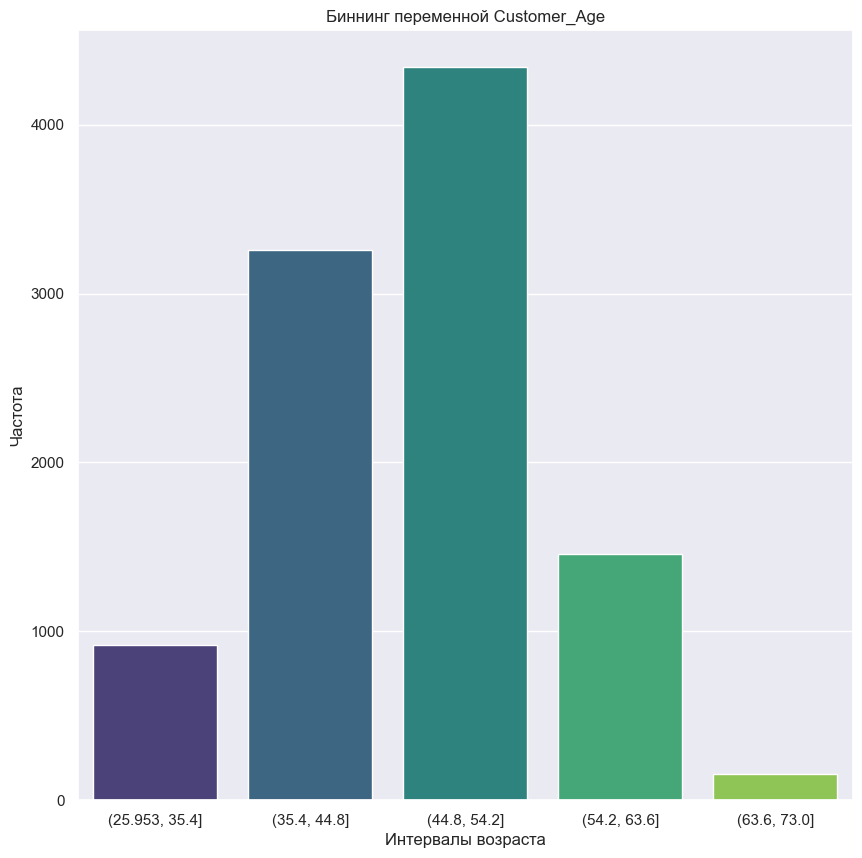

In [29]:

sns.countplot(x='Customer_Age_binned', data=df, palette='viridis')
plt.xlabel('Интервалы возраста')
plt.ylabel('Частота')
plt.title('Биннинг переменной Customer_Age')
plt.show()
